<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/W._P._Carey_School_of_Business_logo.png" width=15% align=left> <br><br>
<img src="">

# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. EDA & Data Preparing](#Data-Prep)
* [3. Machine Learning Models](#ml-models)
* [4. Deployment of Model](#model-deployment)


# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>
    
>**1.1 Problem Statement**<br>
>- Assumption - It is problem in a MNC, where the firm has landed a huge project and it involved some system administration tasks.Hence, operation leadership is running out the resources and hiring new resources will add additional cost to the firm. Hence they are training the exsisting employees to accomplish the task involved in the new project. 

>**1.2 Importance of the Analysis**<br>
>-  The analysis will help the organisation to know whether the task will be complished or not if the employee has given experience and effectiveness of the trainings given. Also the firm wants to understand the performance of employee after the trainings on some new modules. The same analysis can be used in anywhere operations, university, institutes, agencies, etc

>**1.3 Stakeholders**<br> 
>- For this problem, Newly built Operation team of a Multi National Company is the key stakeholders, as they will detect whether a task is completed or not. This helps in evaluting the importance of the trainings provided which help the employee upskill instead of hiring new resources and make profit for the organisation. However, the bigger agenda is that whether they will be able to successfully complete the project or not based on these task prediction

>**1.4 End Goal**<br>
>- Accurate analysis, testing and classification of task and back the story by data provided.    

* [Go to Top](#table-of-content)

# 2. EDA & Data Preparation <a class="anchor" id="Data-Prep"></a>


#### Importing the Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
>- Pandas : 
Used for data manipluation. Refer to Pandas Cheatsheet : https://www.datacamp.com/cheat-sheet/pandas-cheat-sheet-for-data-science-in-python <br>
>- Scikit-learn :
Useful and robust library for machine learning. Refer to SKlearn documentation : https://scikit-learn.org/stable/user_guide.html
>- class_perf_measures() : A custom function, which calculates the mean of the target variable w.r.t to every categorical variable type and give the difference 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))
 
    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy,
                           "F1 Score" : F1
                          })

    # Let's look at our dataframe
    return result

#### Reading the data   <a class="anchor" id="read-data"></a>
>- Link for reading multiple types of input files https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
>- Note: Shift+Tab to look at the parameters any function can take/documentation
* [Go to Top](#table-of-content)

In [2]:
#Reading the data
pd.set_option('display.max_columns', None)
df = pd.read_csv('SystemAdministrators.csv') 
#df.head() #df.tail()

#### Descriptive Analysis <a class="anchor" id="EDA"></a>
There are some common steps followed during any analysis however, may differ data to data. Keep following in mind:

- [Initial Evaluation](#initial-evaluation)
- [Initial Cleanup - dupes, missing values](#missing-values)
- [Outlier Detection & Treatment](#outliers)
- [Feature Selection](#feature-selection)
- [Data Partitioning](#data-split)
- [Data Normalization](#normalization)



* [Go to Top](#table-of-content)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   task_completed       75 non-null     int64  
 1   employee_experience  75 non-null     float64
 2   training_level4      75 non-null     int64  
 3   training_level6      75 non-null     int64  
 4   training_level8      75 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 KB


### Initial Observations
>- **Rows- 75 & Columns- 5** (1: float, 4: int)
>- **Data Interpretation** <br><br>
| #   | Column              |                        Comments                        |   |   |
|-----|---------------------|:------------------------------------------------------:|:-:|---|
| 0   | task_completed      | Target Variable - whether the task is completed or not |   |   |
| 1   | employee_experience | Number of years of experience                          |   |   |
| 2   | training_level4     | Training Level                                         |   |   |
| 3   | training_level6     | Training Level                                         |   |   |
| 4   | training_level8     | Training Level                                         |   |   |

>- **Target Variable: task_completed** <br>

In [4]:
df.describe()

,task_completed,employee_experience,training_level4,training_level6,training_level8
count,75.00,75.00,75.00,75.00,75.00
mean,0.20,6.80,0.76,0.17,0.07
std,0.40,2.27,0.43,0.38,0.25
min,0.00,2.70,0.00,0.00,0.00
25%,0.00,5.20,1.00,0.00,0.00
50%,0.00,6.30,1.00,0.00,0.00
75%,0.00,7.85,1.00,0.00,0.00
max,1.00,13.70,1.00,1.00,1.00


#### Missing & Duplicates Records

* [Go to Top](#table-of-content)

In [5]:
#counting the duplicates
print(df.duplicated().value_counts())                             
df.shape                                                          

False    64
True     11
dtype: int64


(75, 5)

In [6]:
#Finding and treating missing values
df.isnull().sum()                                                 

task_completed         0
employee_experience    0
training_level4        0
training_level6        0
training_level8        0
dtype: int64

#### Outlier Detection and Treatment 

* [Go to Top](#table-of-content)

In [7]:
#working on numerical columns first
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)

In [8]:
pd.DataFrame(dict(mean = df_numeric.mean().round(2),
                  median = df_numeric.median().round(2),
                  std_dev = df_numeric.std().round(2),
                  min_val = df_numeric.min(),
                  max_val = df_numeric.max(),
                  missing_vals = df_numeric.isnull().sum()
                  
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
task_completed,0.20,0.00,0.40,0.00,1.00,0
employee_experience,6.80,6.30,2.27,2.70,13.70,0
training_level4,0.76,1.00,0.43,0.00,1.00,0
training_level6,0.17,0.00,0.38,0.00,1.00,0
training_level8,0.07,0.00,0.25,0.00,1.00,0


## Feature Selection

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'.(dropping the sensitive data)
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>
>4. Since the size of the data is small, taking the smaller subset of test data

>This is simple for now - may need to add more sampling complexity in future

* [Go to Top](#table-of-content)

In [9]:
target = ['task_completed']

In [10]:
X = df.drop(target,axis=1)
y = df[target]

In [11]:
# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=4)

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>

* [Go to Top](#table-of-content)

#### Normalize predictor variables using Z-Scores.
 Use means and standard deviations of features as calculated in the TRAINING DATA
 New values are centered at 0.  Values reflect the number of standard deviations
 each record is above or below the mean.

In [12]:
features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

### Initial Summary:

>- Dataframe - (75,5)
>-Target Variable - task_completed
>-Mising Values - No
>- Duplicates - Yes (not removing them, a per the data, same task can be achieved with the same years of experience and level of trainings 
>-Outliers - No major skewness in the data, will circle back if needed
>-Feature Selection - Including everthing for now
>-Data Normalisation - Essential for KNN model

* [Go to Top](#table-of-content)

## Machine Learning Models <a class="anchor" id="ml-models"></a>

> **Model 1 - kNN** <a class="anchor" id="first-model"></a>
<br>
>To do:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy using the plot

In [13]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]: #np.arange(1,45):  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class),
                    'recall':metrics.recall_score(y_test,y_pred_class),                
                                                      
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy,recall
0,1,0.67,0.33
1,3,0.73,0.33
2,5,0.73,0.33
3,7,0.80,0.67
4,9,0.87,0.67
5,11,0.87,0.67
6,13,0.80,0.33
7,15,0.87,0.33
8,17,0.87,0.33
9,19,0.87,0.33


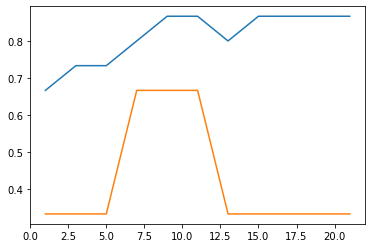

In [14]:
plt.plot(results_df['k'],results_df['accuracy'])
plt.plot(results_df['k'],results_df['recall'])

>**Decision:**<br>
Observation 1: Based on the results above, setting number of neighbors (k) to 9 as this is the lowest value that achieves the highest accuracy value. I set my **k = 9**.

<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of KNN, we will produce a table of performance measures across a range of probability threshold values or can be seen from the plot that post k=5, the accuracy started dropping

In [15]:
knn = KNeighborsClassifier(n_neighbors=9, weights = 'uniform')
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.87
Testing data Accuracy: 0.87


In [16]:
class_perf_measures(knn,X_test,y_test)

C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Pr

,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1 Score
0,0.00,3,0,12,0,0.20,1.00,0.20,0.33
1,0.10,3,8,4,0,0.43,1.00,0.73,0.60
2,0.20,2,10,2,1,0.50,0.67,0.80,0.57
3,0.30,2,10,2,1,0.50,0.67,0.80,0.57
4,0.40,2,10,2,1,0.50,0.67,0.80,0.57
5,0.50,2,11,1,1,0.67,0.67,0.87,0.67
6,0.60,1,11,1,2,0.50,0.33,0.80,0.40
7,0.70,0,12,0,3,0.00,0.00,0.80,0.00
8,0.80,0,12,0,3,0.00,0.00,0.80,0.00
9,0.90,0,12,0,3,0.00,0.00,0.80,0.00


Overview of the Knn class performance for k = 9 <br>
threshold: ranges from 0-1, is the probability for selecting the 1 class which is the task is completed <br>
TP, TN, FP & FN are the classes which will be discussed in details below <br>
Recall : 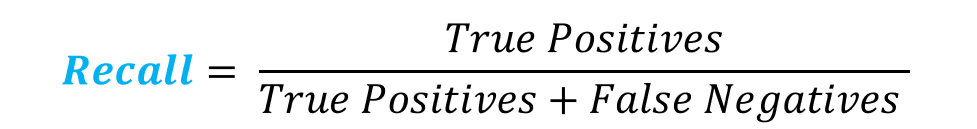
Precision : 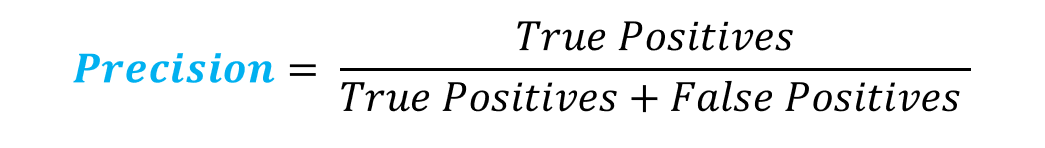

> **Model 2 - Logistics** <a class="anchor" id="second-model"></a>
<br>
>To do:<br>
>1. Fit the model. <br>

In [17]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.92
Testing data Accuracy: 0.8


In [18]:
class_perf_measures(lr_model,X_test,y_test)

C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1 Score
0,0.00,3,0,12,0,0.20,1.00,0.20,0.33
1,0.10,3,9,3,0,0.50,1.00,0.80,0.67
2,0.20,2,10,2,1,0.50,0.67,0.80,0.57
3,0.30,2,10,2,1,0.50,0.67,0.80,0.57
4,0.40,2,10,2,1,0.50,0.67,0.80,0.57
5,0.50,1,11,1,2,0.50,0.33,0.80,0.40
6,0.60,1,11,1,2,0.50,0.33,0.80,0.40
7,0.70,1,11,1,2,0.50,0.33,0.80,0.40
8,0.80,1,11,1,2,0.50,0.33,0.80,0.40
9,0.90,1,11,1,2,0.50,0.33,0.80,0.40


>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

* [Go to Top](#table-of-content)

C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


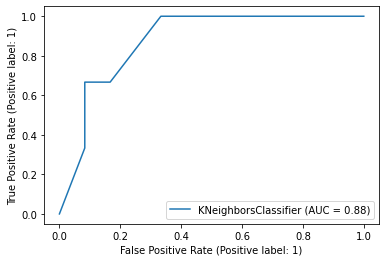

C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


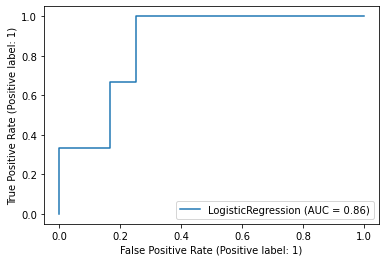

In [19]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is highest for our knn Model so I will use that model to further evaluate probability thresholds and corresponding performance measures. 
Note - There is a lot of overfitting in logistic model due to small dataset. Hence, amother reason to select Knn.

### KNN Model class performance evaluation
**Confusion Matrix**

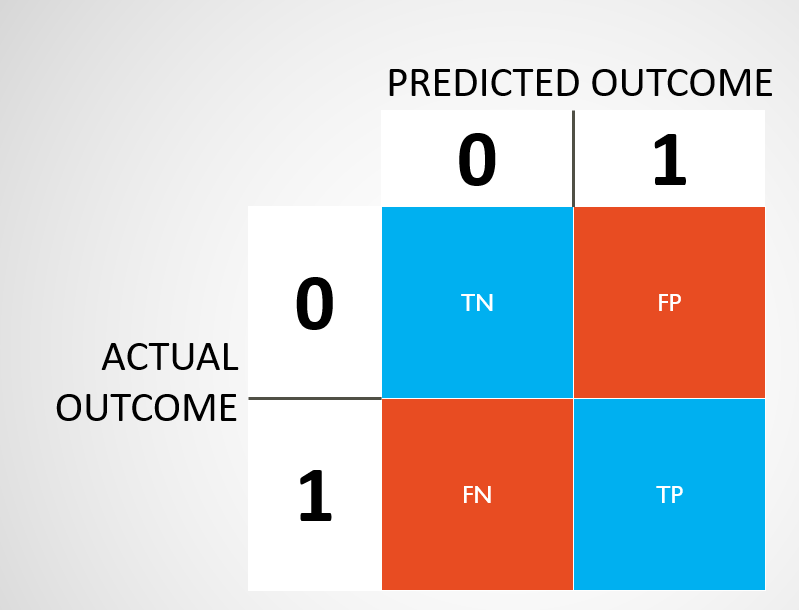

1. **Prob Threshold = 0.8** (High threshold): 

|         |              |   Predicted  |          |   |
|---------|--------------|:------------:|:--------:|---|
|         |              | Complete     | Incomplete   |   |
| Actuals | Complete     | 12           | **00**  |   |
|         | Incomplete   | **03**       | 00      |   |

>- **Interpretation**: The model accurately predicts (by a measure of 80%) whether the task is compeletd or not. Since Accuracy is not the paramount in this problem from the operations team perspective, the agenda is to reduce the incomplete task prediciton class (FN). With high threshold, it is expected to have more incomplete task prediction given the dataset is large (FN + FP).In our case "positive" means "flight is delayed."  <br>
Precision :Out of all the tasks the model predicted, 0% of the times it was actually delayed (TP- 03). 
Recall : Out of all the tasks that were incomplete, our model was able to correctly identify only 0% of them, which is extremely poor. These numbers does not make a lot of sense dure to small dataset but percentage can be a better measure to see.

>- **False Positives FPs & Business Impact** : False Positive indicates that the model classified the task as incomplete when it was completed on time, we see no Fasle positive (FP) class with this high threshold. The model has not predicted any task as incomplete due to high threshold and small dataset. 
It's business impact can be major as we are not predicting any task as incomplete, it is better to flip a coin in this case as our model is not predicting anything. 
It means that no measure is taken in minimising the loss that might occur due to incompletion of task on time which can be very expensive for any team given high burn projects and clients in the organisations. 

>- **False Negative FNs & Business Impact** - with no FP, it is expected to have LOT more FN class ( 03 in our case due to small dataset). It implies that with 0.8 threshold, the operation team will consider 25% of the tasks are complete when they are actually incomplete. It extremely is a loss of huge business as it can involve following cost: 
>1. It leads to incorrect communication to the client which involves huge overall project cost.
>2. There are multiple teams working on a project, it can distrupt everyone's schedule and create additional cost in achieving the task.
>3. The leadership and client has power to terminate the project given incorrect timelines, resources management which impacts the overall organisation reputation. 
>4. Therefore, it is correct to say that predicting the task is complete when it is not is more costlier to the operations team.
Hence, False Negatives are more costlier that False Positive in predicting flight status

>**Conclusion** Since our goal is to minimise the False Negative i.e. **minimising predicting the task as complete when it is actually incomplete**, hence we will move to the next threshold

>Note - The numbers are very skewed due to small dataset.
<br><br>

2. **Prob Threshold = 0.4** (intermediate threshold): 


|         |              |   Predicted  |          |   |
|---------|--------------|:------------:|:--------:|---|
|         |              | Complete     | Incomplete    |   |
| Actuals | Complete     | 11         | **01**  |   |
|         | Incomplete   | **02**       | 01       |   |

>- **Interpretation**: at 40% threshold, the model accurately predicts (by a measure of 80%) whether the task is compeletd or not. Since Accuracy is not the paramount in this problem from the operations team perspective, the agenda is to reduce the incomplete task prediciton class (FN). With high threshold, it is expected to have more incomplete task prediction given the dataset is large (FN + FP).In our case "positive" means "flight is delayed."  <br>
Precision :Out of all the tasks the model predicted, 50% of the times it was actually delayed (TP- 02). 
Recall : Out of all the tasks that were incomplete, our model was able to correctly identify only 33% of them, which is extremely poor. These numbers does not make a lot of sense dure to small dataset but percentage can be a better measure to see.

>- **False Positives FPs & Business Impact** : False Positive indicates that the model classified the task as incomplete when it was completed on time, we see very less Fasle positive (FP) class with this threshold (01). 
It's business impact can be major as we are not predicting any task as incomplete, it is better to flip a coin in this case as our model is not predicting anything. 
It means that no measure is taken in minimising the loss that might occur due to incompletion of task on time which can be very expensive for any team given high burn projects and clients in the organisations. 

>- **False Negative FNs & Business Impact** - with just 1 FP, it is expected to have more FN class ( 02 in our case due to small dataset). It implies that with 0.4 threshold, the operation team will consider 16% of the tasks are complete when they are actually incomplete. It again has business loss as it can involve following cost: 
>1. It leads to incorrect communication to the client which involves huge overall project cost.
>2. There are multiple teams working on a project, it can distrupt everyone's schedule and create additional cost in achieving the task.
>3. The leadership and client has power to terminate the project given incorrect timelines, resources management which impacts the overall organisation reputation. 
>4. Therefore, it is correct to say that predicting the task is complete when it is not is more costlier to the operations team.
Hence, False Negatives are more costlier that False Positive in predicting flight status

>- **Comparison** : 
>- Even though, we do see slight improvement in FN at 0.4 threshold as compared to the 0.8 threshold with reduced # of incorrect predcitions . There is also slight improvement in predicition the task as complete (from 25% to 17%) 
>- Accuracy - There is no improvemnet in the accuracy at the different threshold (0.8 & 0.4)
>- Precision - There is quiet improvemnet in the % of correct task prediction w.r.t to overall prediciton
>- **Recall** - Out of all the incomplete tasks, the model predicted better for 0.4 threshold (33%) as compared to 0.8 threshold (with no predicition)

>**Conclusion** Since our goal is to minimise the False Negative i.e. **minimising predicting the task as complete when it is actually incomplete**, hence we will move to the next threshold

>Note - The numbers are very skewed due to small dataset.
<br><br>


3. **Prob Threshold = 0.2** (Low threshold): 

|         |              |   Predicted  |          |   |
|---------|--------------|:------------:|:--------:|---|
|         |              | Complete    | Incomplete   |   |
| Actuals | Complete    | 10          | **2**  |   |
|         | Incomplete  |**1**       | 02       |   |


>- **Interpretation**: The model accurately predicts (by a measure of 80%) whether the task will be completed or not. However, accuracy is not the paramount in this problem since for the operations team, the agenda is to minimize the cost associated with on time incomplete tasks. In our case "positive" means "the task is completed." 

>- **False Positives FPs & Business Impact** : False Positive indicates that the model predicted the task at a given time is incomplete when it should not, (FP) class -2. It means, out of the total predictions, the model 50% of times will predict the task as incomplete, which is actually equivalent to flipping a coin.
This is a problem for the operations team. Since it leads to the following problems:<br>
>1. If the task is completed and is predicted to be incomplete, it involves wastage of time. Hence time management of the operation teams suffer.
>2. With poor time management, it involves wastage of resources. That is the employee are not working for what they are paid for.
>3. In our case, incorrect communication with the client/ leadership impacts the firm's reputation

>- **False Negative FNs & Business Impact** - with more FP, it is expected to have less FN - 01 (dataset is small). It implies that with 0.2 threshold, only 1 task will be predicted as complete when it is actual incomplete. Out of all the task that were incomplete, our modle was able to predict 67% of them. 
From the operations teams' perspective, it is more costlier to say that the task is complete when it is actually not accomplished.
1. It leads to incorrect communication to the client which involves huge overall project cost.
2. There are multiple teams work on a project, it can distrupt evryone's schedule and create additional cost in achieving the task.
3. The leadership and client has power to terminate the project given incorrect time, resources management which impacts the overall organisation reputation. 
4. Therefore, it is correct to say that predicting the task is complete when it is not is more costlier to the operations team.
(that is minimise fasle negative - recall)

>- **Comparison** -
>- At 0.2 probability threshold, there is no improvement in the precision & recall from 0.4 threshold (50%, 67% resp), which potentially can be a result of small dataset. 
>- However, there is small change in the FN count, which is agenda of the problem as it involves more cost for the operation team as compared to the FP (predicted the task as incomplete when it is done)
    
>- To conclude, Because we want to reduce the FN which are more expensive for the operations team, we would keep the threshold low
<br><br>


4. **My choice of Prob. Threshold = 0.4 **

>- Since there is no change in the Recall (concerning FN) when the threshold is 0.2 & 0.4, I choose 40% as my threshold for my operations team to consider the task as complete.  
Though it can vary upon team to team and dataset to dataset but, as per my opinion the threshold should be 40% given the dataset. 
Higher probability threshold incure more cost involved in wrong predictions. But from an operation's perspective, with lower incomplete prediciton threshold, there will be less cost (time cost, resource cost, firm reputation) involved. Therefore it is rather better to find a way to track the status of the task in cases when the task is predicted as complete like weekly or monthly touchpoints or timeline trackers.


In [20]:
import pickle
pickle_out = open('classifier1', mode='wb')
pickle.dump([knn,features_means, features_std], pickle_out)
pickle_out.close()

In [22]:
%%writefile app1.py

import pickle
import streamlit as st
import math
import pandas as pd
import numpy as np


pickle_in = open('classifier1', 'rb')
knn,features_means, features_std = pickle.load(pickle_in)                 #Loading the classifier, mean, and standard deviation


st.write("Loan Approval Prediction")

@st.cache()

# Define the function which will make the prediction using data
# inputs from users

def getColumnNames():                                                   # returning the column names
    return ['employee_experience', 'training_level4', 'training_level6',
       'training_level8']

def prediction(employee_experience, training_level):                   # creating the prediction function
    
    #initialization                                                    # defining a dictionary for UI dropdown 
    training_levels = {'Traing Level 4':0,
                'Traing Level 6':0,
                'Traing Level 8':0}
    
    #value population
    for level in training_levels:
        if level == training_level:
            training_levels[level] = 1
            
    X_test_df = pd.DataFrame([[employee_experience,                   # creating a new dataframe 
            training_levels.get('Traing Level 4'),
            training_levels.get('Traing Level 6'),
            training_levels.get('Traing Level 8')]], 
        columns=getColumnNames())
    
    
    # Make predictions
    prediction = knn.predict_proba(X_test_df)
    THRESHOLD = 0.4
    if prediction[0][1] > THRESHOLD:
        return 'Task will be completed'
    else: 
        return 'Task will not be completed'

# This is the main function in which we define our webpage
def main():
    
    # Create input fields
    employee_experience = st.number_input("Employees experience",
                                  min_value=2.0,
                                  max_value=14.0,
                                  value=7.0,
                                  step=0.5,
                                 )
               
    training_level = st.selectbox('Select the training level of employee',
                             ('Traing Level 4','Traing Level 6','Traing Level 8'))
    
    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Task Status Prediction"):
        result = prediction(employee_experience, training_level)
        st.success(result)  
  
            
        
if __name__=='__main__':
    main()

Writing app1.py


In [23]:
!streamlit run app1.py

^C
